# Analysis
In this notebook that analysis is done. 

Things that are done in this section:
- Implement functions that exctract information from the .dat files
   - The header
   - The contribution summary
   - The contribution per generation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from analysis import *
import simulation

In [15]:
#testFile = "TestSimulation.dat"
testFile = "figure4__100000_4_2_100_EveryRound_1.00_1.00_1000_1_4_StepWiseLinear_1_10.00.dat"

Detail TestSimulation:

    generations = 10000
    numberOfGames = 1000
    numberOfRounds = 4
    groupSize = 2
    popSize = 100

    alphaPoor = 0.8
    alphaRich = 0.8
    wealthPoor = 1
    wealthRich = 1
    typeOfRiskCurve = RiskCurve.Linear

    heterogeneous = False

Detail TestHeteroSimulation:

    generations = 10000
    numberOfGames = 1000
    numberOfRounds = 4
    groupSize = 2
    popSize = 100

    alphaPoor = 0.8
    alphaRich = 0.5
    wealthPoor = 1
    wealthRich = 4
    typeOfRiskCurve = RiskCurve.Linear

    heterogeneous = True
    

## Reading the file

### ReadingHeader

In [16]:
header = readHeader(filename = testFile)
header

{'alpha_poor': 1.0,
 'alpha_rich': 1.0,
 'group_size': 2.0,
 'heterogenous': 1.0,
 'lambda_value': 10.0,
 'nr_generations': 100000.0,
 'number_of_games': 1000.0,
 'number_of_rounds': 4.0,
 'population_size': 100.0,
 'risk_in_round': 'EveryRound',
 'type_of_risk_curve': 'StepWiseLinear',
 'wealth_poor': 1.0,
 'wealth_rich': 4.0}

### Reading the contribution 

In [17]:
ContributionArray = readContributionFileToData(fileName = testFile, heterogeneous = header["heterogenous"], rounds = int(header["number_of_rounds"]))
ContributionArray.shape

(100000, 2, 4)

/usr/lib/python3/dist-packages/IPython/core/events.py:74: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/lib/python3/dist-packages/IPython/core/pylabtools.py:125: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


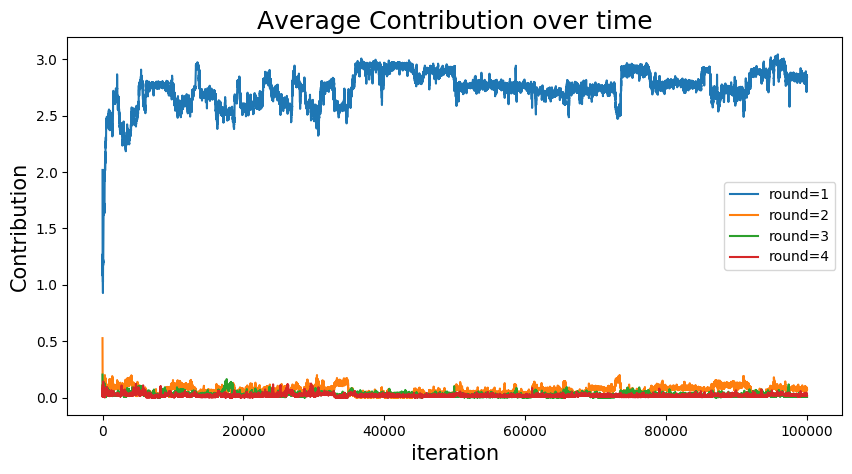

In [18]:
fig = plotContributionVsGeneration(ContributionArray,True)

### Reading summary

In [6]:
summary = readSummary(filename=testFile,heterogeneous=header["heterogenous"])
summary

{'AverageContribution': 1.074411,
 'AverageContributionPerRoundPoor': array([0.032465, 0.024197, 0.044682, 0.023987]),
 'AverageContributionPerRoundRich': array([1.33769 , 0.527399, 0.148458, 0.009456])}

-------
Things to further do:
- Combine the information of multiple simulations in one plot
- Make plots of the paper.

# Plotting Figure4

In [2]:
def readFigure4Data():
    # Predefine some of the data:

    generations = 100000
    numberOfRounds = 4
    groupSize = 2
    popSize = 100
    numberOfGames = 1000
    wealthPoor = 1
    wealthRich = 4
    typeOfRiskCurve = simulation.RiskCurve(3)
    heterogeneous = 1
    globalLambdaValue = 10.00
    
    filename = "figure4_"

    arrayRiskInRound = np.arange(1,5)# [1,2,3,4]
    arrayAlphaPoor = np.array([1.0,1.0,0.5,0.5])
    arrayAlphaRich = np.array([1.0,0.8,0.8,0.5])
    
    ContributionFig4 = np.empty(shape=(4,4,2,4))# [alphaConfiguration,riskInRound,wealth,round]
    
    startIndex, endIndex = (70000,generations)
    
    for row, (alphaPoor, alphaRich) in enumerate(zip(arrayAlphaPoor,arrayAlphaRich)):
        for column in range(4):
            riskInRound = simulation.RiskInRound(column+1)
            
            #### Load the file and the header #####
            StringName = "%s_%d_%d_%d_%d_%s_%0.2f_%0.2f_%d_%d_%d_%s_%d_%0.2f.dat" % (filename, generations, numberOfRounds, groupSize, popSize, riskInRound.name, alphaPoor, alphaRich, numberOfGames, wealthPoor, wealthRich, typeOfRiskCurve.name, heterogeneous, globalLambdaValue)
            HeaderFile = readHeader(filename=StringName)
            
            #### Compute the averaging over the relevant itterations #####
            # Uncomment the method that you want to use:
            
            # Read out summary
            #summary = readSummary(filename=StringName,heterogeneous=HeaderFile["heterogenous"])
            #thePoor = summary['AverageContributionPerRoundPoor']
            #theRich = summary['AverageContributionPerRoundRich']
            
            # Read out just the generations from start to end index
            ContributionArray = readContributionFileToData(fileName = StringName, heterogeneous = HeaderFile["heterogenous"], rounds = int(HeaderFile["number_of_rounds"]))
            Average = np.mean(ContributionArray[startIndex:endIndex,:,:],axis=0)
            thePoor = Average[1]
            theRich = Average[0]
            
            #### Save the contribution levels in the tensor #####
            ContributionFig4[row,column,0,:] = thePoor
            ContributionFig4[row,column,1,:] = theRich
    
    return ContributionFig4

ContributionFig4 = readFigure4Data()
ContributionFig4.shape

(4, 4, 2, 4)

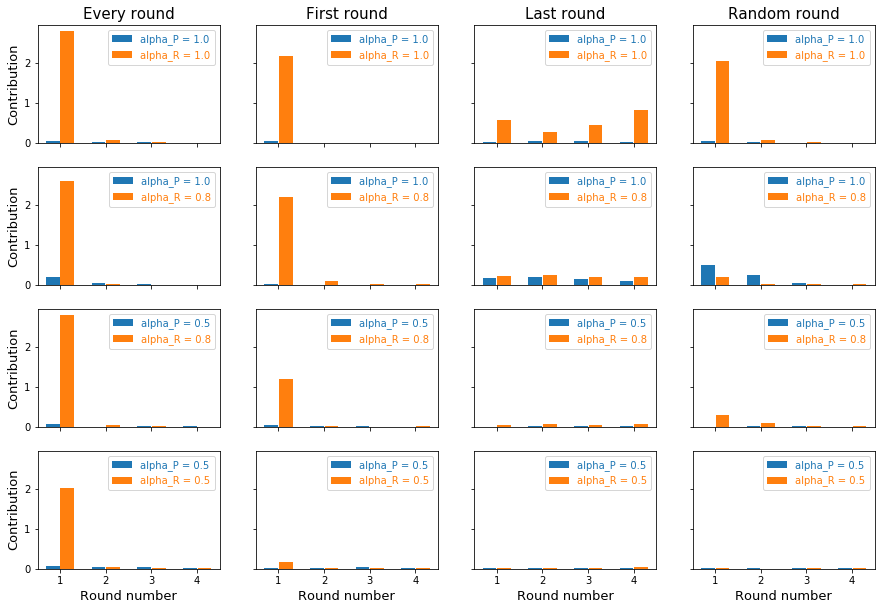

In [9]:
def plotFigure4(ContributionTensor):
    """ Plots Figure 4 of the paper
    Attribute:
        -ContributionTensor: a 4 dimensional numpy tensor where the indexes correspond to:
            ContributionTensor[alphaConfiguration,riskInRound,wealth,round]
    """
    fig, axs = plt.subplots(nrows=4, ncols=4, sharex=True, sharey=True,figsize=(15,10))
    
    # labels and titles
    Column_title = ["Every round", "First round", "Last round", "Random round"]
    y_axis_label = "Contribution"
    x_axis_label = "Round number"
    
    # use LaTeX fonts in the plot (doesn't want to work :( )
    #plt.rc('text', usetex=True)
    #plt.rc('font', family='serif')
    
    # Bar properties
    centreLocation = np.array([1,2,3,4]) # Centre location where the group of bars is going to be placed
    bar_width = 0.3 # Width of the bars
    gapInBetween = 0.02 # Gap inbetween the bars
    poorLocation = centreLocation - bar_width/2 - gapInBetween/2 # Have an extra -0.01 to create a gap between the bars
    richLocation = centreLocation + bar_width/2 + gapInBetween/2
    
    arrayAlphaPoor = np.array([1.0,1.0,0.5,0.5])
    arrayAlphaRich = np.array([1.0,0.8,0.8,0.5])
    
    for row, (axs_row,(alphaPoor,alphaRich)) in enumerate(zip(axs,zip(arrayAlphaPoor,arrayAlphaRich))):
        for column, ax  in enumerate(axs_row):
            ### Set labels and title
            if row == 0:
                ax.set_title(Column_title[column], fontsize=15)
            if column == 0:
                ax.set_ylabel(y_axis_label, fontsize=13)
            if row == 3:# aka the last row
                ax.set_xlabel(x_axis_label, fontsize=13)
                
            ### Set x-ticks correct
            ax.set_xticks(centreLocation)
            
            ### Plot the bars
            ax.bar(poorLocation, ContributionTensor[row,column,0,:], bar_width, label=f"alpha_P = {alphaPoor}")
            ax.bar(richLocation, ContributionTensor[row,column,1,:], bar_width, label=f"alpha_R = {alphaRich}")
            
            ### Plot legend
            leg = ax.legend()
            # Set text of the color equal to that of the barr. 
            for patch,text in zip(leg.get_patches(), leg.get_texts()):
                text.set_color(patch.get_facecolor())
            
                
    
plotFigure4(ContributionFig4)

In [14]:
ContributionFig4[0,0]

array([[0.01733976, 0.01395503, 0.04264893, 0.02065644],
       [0.53734529, 0.13296701, 0.10743812, 0.01786324]])